In [119]:
import cobra
import os
from os.path import join
from cobra.flux_analysis import calculate_phenotype_phase_plane
import pandas
pandas.options.display.max_rows = 100

data_dir = "/Users/david/Dropbox (UCSD SBRG)/Xam_Multistrain_Recon/Metabolic_model/BiGG_Model/"
xam_model = cobra.io.read_sbml_model(join(data_dir, "Xam_BiGG.xml"))

import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from time import time

### Original model

In [120]:
print (len(xam_model.reactions))
print (len(xam_model.metabolites))
print (len(xam_model.genes))

1548
1518
878


In [45]:
for i in [i.id for i in xam_model.reactions if len(i.metabolites) == 1]:
    reaction = xam_model.reactions.get_by_id(i)
    print('%s;%s;%s;%i;%i' % (reaction.id, reaction.name, reaction.reaction, reaction.lower_bound, reaction.upper_bound))

EX_2ddglcn_e;None;2ddglcn_e <=> ;-1000;1000
EX_4hbz_e;None;4hbz_e <=> ;-1000;1000
EX_ac_e;None;ac_e <=> ;-1000;1000
EX_acald_e;None;acald_e <=> ;-1000;1000
EX_acgam_e;None;acgam_e <=> ;-1000;1000
EX_adn_e;None;adn_e <=> ;-1000;1000
EX_akg_e;None;akg_e <=> ;-1000;1000
EX_ala__D_e;None;ala__D_e <=> ;-1000;1000
EX_arab__L_e;None;arab__L_e <=> ;-1000;1000
EX_arbt_e;None;arbt_e <=> ;-1000;1000
EX_arg__L_e;None;arg__L_e <=> ;-1000;1000
EX_ASPt5n_e;None;asp__L_e <=> ;-1000;1000
EX_Biomass_e;None;BIOMASS_c <=> ;-1000;1000
EX_ca2_e;None;ca2_e <=> ;-1000;1000
EX_cbl1_e;None;cbl1_e <=> ;-1000;1000
EX_cd2_e;None;cd2_e <=> ;-1000;1000
EX_chol_e;None;chol_e <=> ;-1000;1000
EX_cit_e;None;cit_e <=> ;-1000;1000
EX_cl_e;None;cl_e <=> ;-1000;1000
EX_co2_e;None;co2_e <=> ;-1000;1000
EX_cobalt2_e;None;cobalt2_e <=> ;-1000;1000
EX_cu2_e;None;cu2_e <=> ;-1000;1000
EX_cytd_e;None;cytd_e <=> ;-1000;1000
EX_dad_2_e;None;dad_2_e <=> ;-1000;1000
EX_dcyt_e;None;dcyt_e <=> ;-1000;1000
EX_dgsn_e;None;dgsn_e <=> ;-10

In [ ]:
# Change only the necessary reactions
# xam_model.reactions.get_by_id("EX_cpd11416_c0").lower_bound = 1000

# Test Media

* Read the file

In [121]:
import csv
with open('Exchange_Low_Boundaries.csv', mode='r') as infile:
    reader = csv.reader(infile)
    reac_low = dict((rows[0],rows[1]) for rows in reader)

* Change boundaries

In [122]:
for name, lower in reac_low.items():
    xam_model.reactions.get_by_id(name).lower_bound = float(lower)

* Verify

In [91]:
for i in [i.id for i in xam_model.reactions if len(i.metabolites) == 1]:
    reaction = xam_model.reactions.get_by_id(i)
    print('%s\t%s\t%s\t%i\t%i' % (reaction.id, reaction.name, reaction.reaction, reaction.lower_bound, reaction.upper_bound))

EX_2ddglcn_e	None	2ddglcn_e --> 	0	1000
EX_4hbz_e	None	4hbz_e <=> 	-10	1000
EX_ac_e	None	ac_e --> 	0	1000
EX_acald_e	None	acald_e --> 	0	1000
EX_acgam_e	None	acgam_e --> 	0	1000
EX_adn_e	None	adn_e --> 	0	1000
EX_akg_e	None	akg_e --> 	0	1000
EX_ala__D_e	None	ala__D_e --> 	0	1000
EX_arab__L_e	None	arab__L_e --> 	0	1000
EX_arbt_e	None	arbt_e --> 	0	1000
EX_arg__L_e	None	arg__L_e <=> 	-10	1000
EX_ASPt5n_e	None	asp__L_e --> 	0	1000
EX_Biomass_e	None	BIOMASS_c --> 	0	1000
EX_ca2_e	None	ca2_e <=> 	-10	1000
EX_cbl1_e	None	cbl1_e --> 	0	1000
EX_cd2_e	None	cd2_e --> 	0	1000
EX_chol_e	None	chol_e --> 	0	1000
EX_cit_e	None	cit_e --> 	0	1000
EX_cl_e	None	cl_e <=> 	-10	1000
EX_co2_e	None	co2_e --> 	0	1000
EX_cobalt2_e	None	cobalt2_e <=> 	-10	1000
EX_cu2_e	None	cu2_e <=> 	-10	1000
EX_cytd_e	None	cytd_e --> 	0	1000
EX_dad_2_e	None	dad_2_e --> 	0	1000
EX_dcyt_e	None	dcyt_e --> 	0	1000
EX_dgsn_e	None	dgsn_e --> 	0	1000
EX_din_e	None	din_e --> 	0	1000
EX_DNA_e	None	dna_c <=> 	-10	1000
EX_duri_e	None	dur

### FBA

In [123]:
import pandas
pandas.options.display.max_rows = 300

%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

from cobra.flux_analysis.loopless import construct_loopless_model

In [124]:
FBA_sol = xam_model.optimize()
print (FBA_sol)

<Solution 2.13 at 0x11b603290>


In [125]:
xam_model.solution.status

'optimal'

In [126]:
FBA_results = xam_model.solution.x_dict
fba_df = pandas.DataFrame.from_dict(FBA_results, orient='index').T.round(5)
fba_df_t = pandas.DataFrame.transpose(fba_df)
fba_df_t = fba_df_t.rename_axis("Reaction")
fba_df_t = fba_df_t.rename_axis({0: "Flux"}, axis="columns")
print(fba_df_t)
fba_df_t.to_csv('Flux_results.csv', sep=',')

                        Flux
Reaction                    
CSND                 0.00000
MNXR8691             0.00000
NTD10                0.00000
NTD11                0.00000
GLYBabc              0.00000
XTSNH                0.35490
DDPA                -0.60490
P5CD              -999.07687
P5CR             -1000.00000
GLUTRR              -0.10534
GLUTRS              -0.10534
MG2t                 0.00658
KARI_23dhmp          0.69526
ACALDt               0.00000
CO2t                 0.00000
MNXR3469             0.00000
KARI_23dhmb      -1000.00000
GUDBUTNAH           -9.46887
PANTS               -0.01317
E4PD                 0.00000
PLIPA2A180pp     -1000.00000
MNXR87148            0.21272
TDPGDH               0.05318
CYTDt2               0.00000
MNXR8073             0.00000
GAPDH_nadp_hi     1000.00000
rxn05379_c0         -0.18113
MNXR2826             0.00000
ADSL2r              -0.66273
UAGPT3              -0.05318
UAGPT2               0.00000
GART                 0.00000
EX_hxan_e     

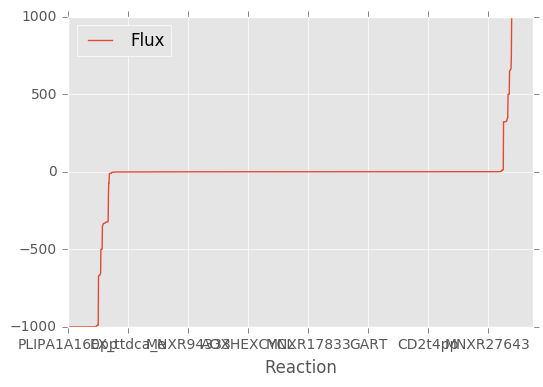

In [53]:
fba_df_sort = fba_df_t.sort_values(by="Flux")
plt.figure()
fba_df_sort.plot.line()

### Loopless FBA

In [ ]:
Xam_loopless = construct_loopless_model(xam_model)
FBA_loopless_sol = Xam_loopless.optimize()
print (FBA_loopless_sol)

### FVA

In [54]:
fva_results = cobra.flux_analysis.flux_variability_analysis(xam_model, xam_model.reactions, fraction_of_optimum=0.9)
fva_df = pandas.DataFrame.from_dict(fva_results).T.round(5)
fva_df.index.name = 'reaction'
print(fva_df)

                  maximum     minimum
reaction                             
10FTHFGLULL       0.00000     0.00000
2DHPFALDL         0.00000     0.00000
2HBO              0.00000     0.00000
2OH3K5MPPISO      0.00000     0.00000
34DHOXPEGOX       0.00000     0.00000
3HAO              0.00000     0.00000
3HBCOAHL          0.00000  -669.72733
3HLYTCL           0.00000     0.00000
3OAR100           0.00000     0.00000
3OAR120           0.00000     0.00000
3OAR40_1          0.00000     0.00000
3OAR60            0.00000     0.00000
3OAR80            0.00000     0.00000
3OAS80            0.00000     0.00000
4ABUTD            0.00000     0.00000
4CMLCL_kt         0.00000     0.00000
4HTHRS            0.00000     0.00000
56DH5FLURAAMH     0.00000     0.00000
5FLURAPRT         0.00000     0.00000
5HLTDL            0.00000     0.00000
5HXKYNDCL         0.00000     0.00000
A5PISO           -0.14359    -0.15954
AACOAR_syn     1000.00000 -1000.00000
AACOAT            0.00000  -999.04382
AASPh       

In [55]:
fva_df_sort = fva_df.sort_values(by=['maximum', 'minimum'])
print(fva_df_sort)

                  maximum     minimum
reaction                             
EX_glc__D_e      -8.83333   -10.00000
EX_arg__L_e      -7.48371   -10.00000
O2t              -6.15007   -16.65600
H2Ot             -5.96012   -25.73650
ASPATh           -2.44042 -1000.00000
GALh             -2.36334 -1000.00000
EX_DNA_e         -1.91367    -2.12630
EX_protein_e     -1.91367    -2.12630
EX_rna_c0        -1.91367    -2.12630
MCOATA           -1.90831    -2.12034
EX_pi_e          -1.53609   -10.00000
APLh             -1.40428  -671.13160
PRPPS            -1.15016 -1000.00000
NDPK2            -0.74832  -999.82280
ICH              -0.74815  -340.03564
IMDHT            -0.71837    -0.97931
IPMD             -0.71837    -0.97931
IPPS             -0.71837    -0.97931
OMCDC            -0.71837    -0.97931
MNXR79878        -0.59646 -1000.00000
ADSL2r           -0.59646    -1.85460
GLUPRT           -0.59646    -1.85460
PPRGL            -0.59646    -1.85460
PRAIS            -0.59646    -1.85460
PRAISh      

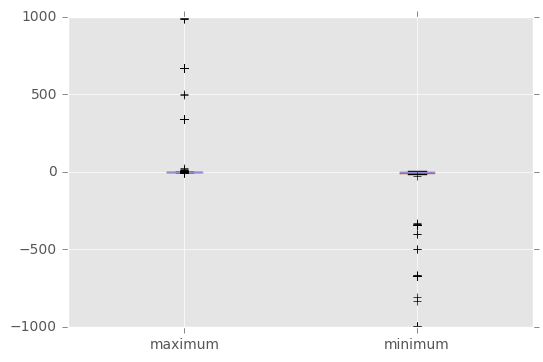

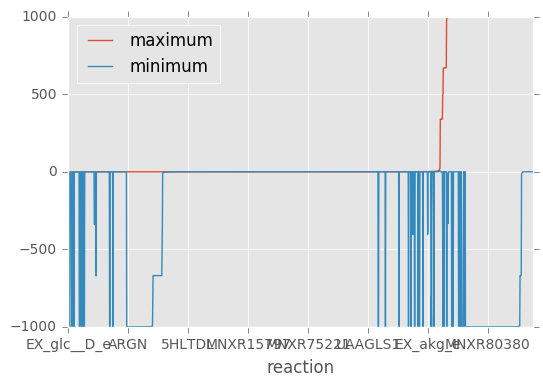

In [56]:
plt.figure(dpi=400)
fva_df_sort.plot.box()
#plt.savefig('FVA_Xam_box_50.svg', format='svg', dpi=1200)
#plt.savefig('FVA_Xam_box_50.png', format='png', dpi=1200)
fva_df_sort.plot.line()
#plt.savefig('FVA_Xam_plot_50.svg', format='svg', dpi=1200)
#plt.savefig('FVA_Xam_plot_50.png', format='png', dpi=1200)

### Active Fluxes

In [57]:
import numpy

fva_df_sort_equal = fva_df_sort[(fva_df_sort["maximum"] > 0) & (fva_df_sort["minimum"] < 0)]
print(fva_df_sort_equal)

                   maximum     minimum
reaction                              
AMPTASECG          0.00658  -999.99407
MG2t               0.00658  -999.99407
Kt1                0.01317  -999.98815
HACD9              0.18113  -999.37426
MNXR87148          0.21272  -998.85237
SO4t2              0.46657  -999.58008
TKT2               0.59863  -403.89206
TMDK1              0.70000 -1000.00000
INSH               0.70000  -998.84984
ACS                0.72023  -998.32359
EDA                0.76516 -1000.00000
DURIK1             0.77778 -1000.00000
ITCY               0.77778 -1000.00000
AGDC               1.06645  -997.97737
TKT1               1.33449  -403.15620
P5CD               1.75279  -999.64721
RPE                1.93313  -807.04827
GCC2cm             2.07444 -1000.00000
RPI                2.48465  -332.84568
SUCLm              3.23571 -1000.00000
FERO             493.81734  -500.00494
MNXR93746        499.52191 -1000.00000
PDHam2hi         667.69731 -1000.00000
APATr            669.7154

In [58]:
print(len(fva_df_sort_equal))

251


### Sensibility Analyses

#### Glucose vs. O2

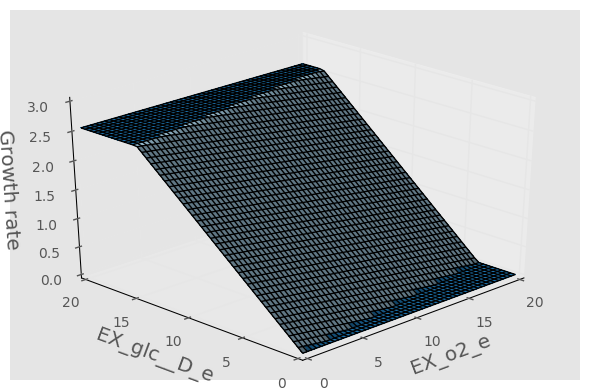

In [118]:
data = calculate_phenotype_phase_plane(xam_model, "EX_o2_e", "EX_glc__D_e")
data.plot_matplotlib();

#### Glucose Vs. CO2 without O2

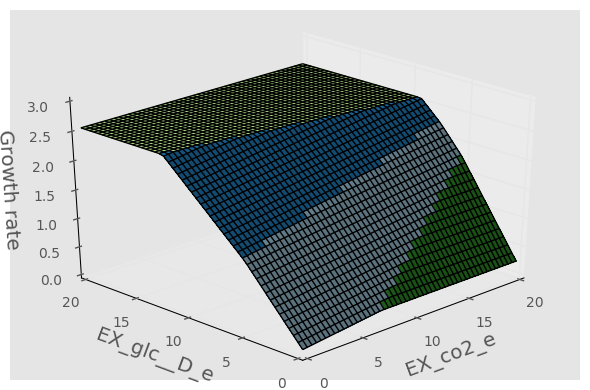

In [27]:
xam_model.reactions.get_by_id("EX_o2_e").lower_bound = 0
xam_model.reactions.get_by_id("EX_co2_e").lower_bound = -20
data = calculate_phenotype_phase_plane(xam_model, "EX_co2_e", "EX_glc__D_e")
data.plot_matplotlib();
xam_model.reactions.get_by_id("EX_co2_e").lower_bound = 0
xam_model.reactions.get_by_id("EX_o2_e").lower_bound = -20

#### Glucose Vs. CO2 with O2

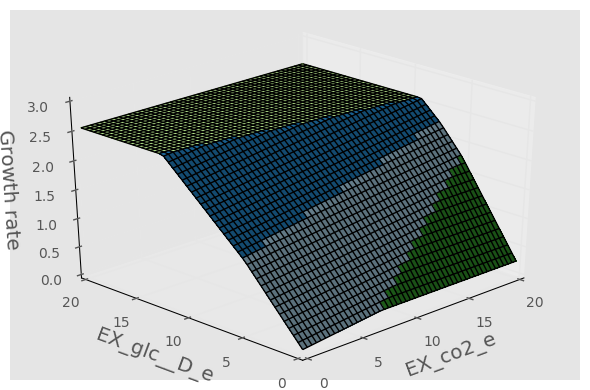

In [28]:
xam_model.reactions.get_by_id("EX_co2_e").lower_bound = -20
data = calculate_phenotype_phase_plane(xam_model, "EX_co2_e", "EX_glc__D_e")
data.plot_matplotlib();
xam_model.reactions.get_by_id("EX_co2_e").lower_bound = 0

#### Carbon Source Vs. O2

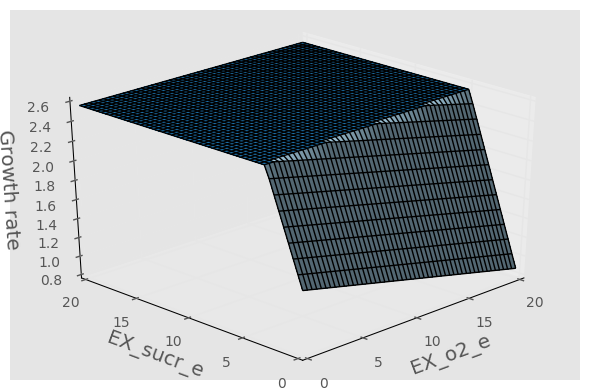

In [29]:
xam_model.reactions.get_by_id("EX_glc__D_e").lower_bound = 0
xam_model.reactions.get_by_id("EX_xyl__D_e").lower_bound = -10
data = calculate_phenotype_phase_plane(xam_model, "EX_o2_e", "EX_sucr_e")
data.plot_matplotlib();
xam_model.reactions.get_by_id("EX_glc__D_e").lower_bound = -10
xam_model.reactions.get_by_id("EX_xyl__D_e").lower_bound = 0

### Glucose Vs. Other

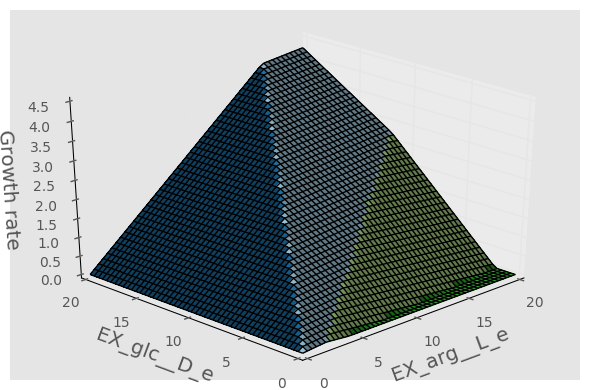

In [30]:
data = calculate_phenotype_phase_plane(xam_model, "EX_arg__L_e", "EX_glc__D_e")
data.plot_matplotlib();

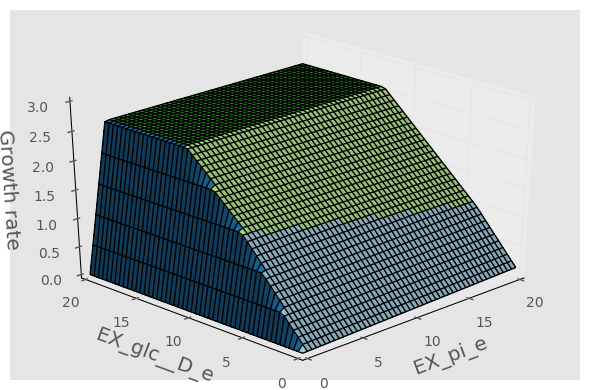

In [33]:
data = calculate_phenotype_phase_plane(xam_model, "EX_pi_e", "EX_glc__D_e")
data.plot_matplotlib();

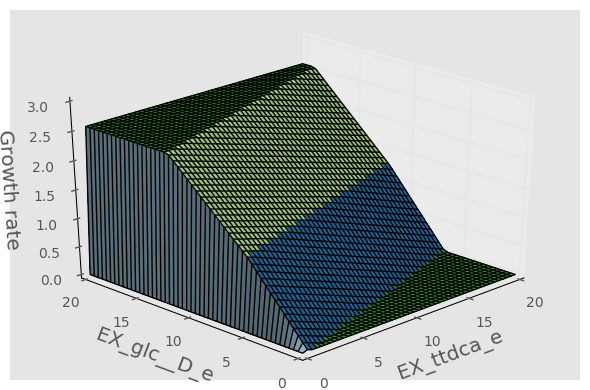

In [32]:
data = calculate_phenotype_phase_plane(xam_model, "EX_ttdca_e", "EX_glc__D_e")
data.plot_matplotlib();

### Exchange reactions

In [34]:
for i in [i.id for i in xam_model.reactions if len(i.metabolites) == 1]:
    reaction = xam_model.reactions.get_by_id(i)
    print('%s\t%s\t%s\t%i\t%i' % (reaction.id, reaction.name, reaction.reaction, reaction.lower_bound, reaction.upper_bound))

EX_2ddglcn_e	None	2ddglcn_e --> 	0	1000
EX_4hbz_e	None	4hbz_e <=> 	-10	1000
EX_ac_e	None	ac_e --> 	0	1000
EX_acald_e	None	acald_e --> 	0	1000
EX_acgam_e	None	acgam_e --> 	0	1000
EX_adn_e	None	adn_e --> 	0	1000
EX_akg_e	None	akg_e --> 	0	1000
EX_ala__D_e	None	ala__D_e --> 	0	1000
EX_arab__L_e	None	arab__L_e --> 	0	1000
EX_arbt_e	None	arbt_e --> 	0	1000
EX_arg__L_e	None	arg__L_e <=> 	-10	1000
EX_ASPt5n_e	None	asp__L_e --> 	0	1000
EX_Biomass_e	None	BIOMASS_c --> 	0	1000
EX_ca2_e	None	ca2_e <=> 	-10	1000
EX_cbl1_e	None	cbl1_e --> 	0	1000
EX_cd2_e	None	cd2_e --> 	0	1000
EX_chol_e	None	chol_e --> 	0	1000
EX_cit_e	None	cit_e --> 	0	1000
EX_cl_e	None	cl_e <=> 	-10	1000
EX_co2_e	None	co2_e --> 	0	1000
EX_cobalt2_e	None	cobalt2_e <=> 	-10	1000
EX_cu2_e	None	cu2_e <=> 	-10	1000
EX_cytd_e	None	cytd_e --> 	0	1000
EX_dad_2_e	None	dad_2_e --> 	0	1000
EX_dcyt_e	None	dcyt_e --> 	0	1000
EX_dgsn_e	None	dgsn_e --> 	0	1000
EX_din_e	None	din_e --> 	0	1000
EX_DNA_e	None	dna_c <=> 	-10	1000
EX_duri_e	None	dur